Index(['cod_prov', 'name', 'cod_ccaa', 'cartodb_id', 'created_at',
       'updated_at', 'geometry'],
      dtype='object')
{'Alava': 30, 'Albacete': 40, 'Alicante': 80, 'Almeria': 55, 'Avila': 35, 'Badajoz': 45, 'Baleares': 85, 'Barcelona': 60, 'Burgos': 38, 'Caceres': 50, 'Cadiz': 90, 'Castellon': 70, 'Ciudad Real': 47, 'Cordoba': 52, 'Coruna': 66, 'Cuenca': 37, 'Gerona': 58, 'Granada': 62, 'Guadalajara': 42, 'Guipuzcoa': 49, 'Huelva': 65, 'Huesca': 36, 'Jaen': 55, 'Leon': 43, 'Lerida': 50, 'Lugo': 63, 'Madrid': 46, 'Malaga': 88, 'Murcia': 85, 'Navarra': 41, 'Orense': 39, 'Asturias': 53, 'Palencia': 33, 'Las Palmas': 90, 'Pontevedra': 60, 'Salamanca': 44, 'Santa Cruz de Tenerife': 89, 'Cantabria': 57, 'Segovia': 30, 'Sevilla': 50, 'Soria': 32, 'Tarragona': 64, 'Teruel': 31, 'Toledo': 40, 'Valencia': 80, 'Valladolid': 48, 'Vizcaya': 51, 'Zamora': 28, 'Zaragoza': 39, 'Ceuta': 75, 'Melilla': 77}


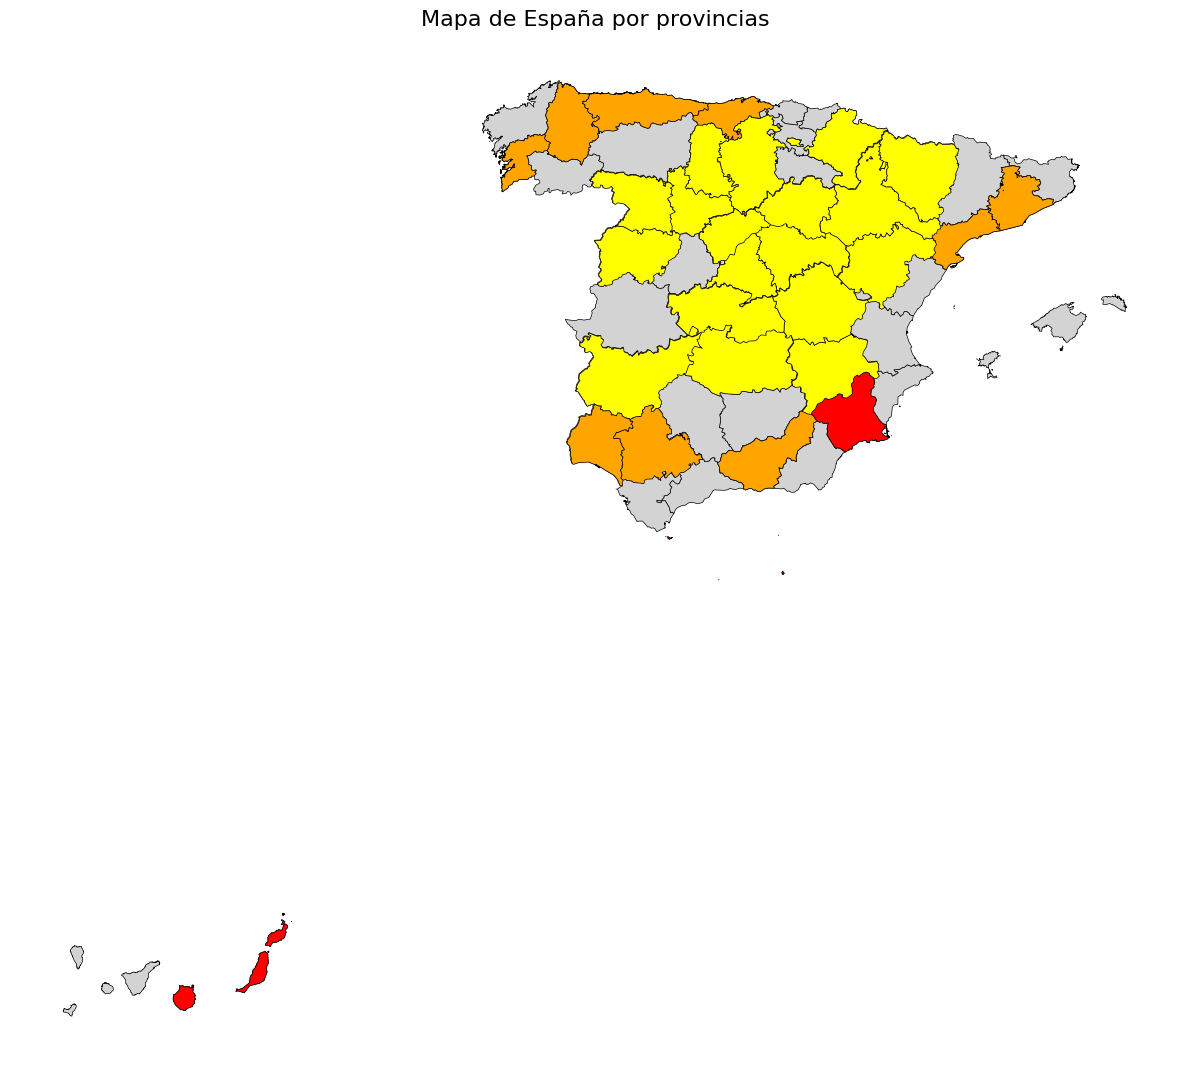

In [ ]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("riesgo_realista.csv")

# Convertirlo en un diccionario con la provincia como clave
diccionario_riesgos = dict(zip(df["Provincia"], df["Riesgo_Climatologico"]))

import geopandas as gpd
import matplotlib.pyplot as plt
import sys

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/spain-provinces.geojson"
provincias = gpd.read_file(url)

# Crear el mapa base
fig, ax = plt.subplots(figsize=(12, 12))

# Dibujar todas las provincias en gris claro
provincias.plot(ax=ax, color='green', edgecolor='black', linewidth=0.5)

# Personalizar el mapa
ax.set_title('Mapa de España por provincias', fontsize=16)
ax.set_axis_off()  # Ocultar ejes

print(provincias.columns)
print(diccionario_riesgos)

# Función para colorear una provincia específica
def colorear_provincia(codigo, color, ax):
    provincia = provincias[provincias['name'] == str(codigo)]
    if not provincia.empty:
        provincia.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)

def applyColors(colores):
    for nombre, precision in colores.items():
        if (precision < 25):
            colorear_provincia(nombre, 'green', ax)
        elif(precision < 50):
            colorear_provincia(nombre, 'yellow', ax)
        elif(precision < 75):
            colorear_provincia(nombre, 'orange', ax)
        else:
            colorear_provincia(nombre, 'red', ax)
        

applyColors(diccionario_riesgos)

# Mostrar el mapa
plt.savefig("../images/mapa.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()